In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

My two data sources are the COVID-19 Vaccinations in the United States,County and the NWSS Public SARS-CoV-2 Wastewater Metric Data, both provided by the CDC for public use. I want to compare Vaccination Rates to COVID-19 rates across counties. To do this, I wanted an alternative to COVID-19 case rates provided by traditional PCR tests or rapid antigen tests. These two afformentioned ways of testing introduce numerous biases and errors stemming from the voluntary nature of the tests. SARS-CoV-2 Wastewater Metric Data, on the other hand, does not rely on citizens getting tested frequently. Instead, SARS-CoV-2 RNA levels are measured in the sewage and compared to past concentrations. This method allows scientists to more accurately identify surges in cases, especially when asymptomatic cases are on the rise. Finally, in terms of data validity and accuracy, I place my utmost trust in the methods a principal scientific institution. 

This next section parses the abundant data obtained by the CDC. Through a number of parsing methods, filters, indexes, and joins, I was able to create a dataframe that suited my needs.

# Begin parsing of Wastewater data

In [2]:
#Reading the wastewater data, creating a dataframe, and parsing the date columns from strings into dates.
dfw = pd.read_csv('wastewater.csv',parse_dates = ['date_start','date_end'])

# Begin filtering of Wastewater data

In [3]:
#filtering out the columns not of interest
dfw = dfw[['county_names','county_fips','population_served','date_start','date_end','ptc_15d','detect_prop_15d','percentile']]

In [4]:
#creating new dataframe for just Salt Lake County
dfSL = dfw[(dfw['county_names']=='Salt Lake')]

In [5]:
#new dataframe for largest portion of Salt Lake County
dfSL2=dfSL[(dfw['population_served']==515494)]

/tmp/ipykernel_181205/4191050093.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfSL2=dfSL[(dfw['population_served']==515494)]


In [6]:
#creating new dataframe for just Utah county
dfUT = dfw[(dfw['county_names']=='Utah')]

In [7]:
#new dataframe for largest portion of Utah county
dfUT2=dfUT[(dfw['population_served']==102624)]

/tmp/ipykernel_181205/3370732465.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfUT2=dfUT[(dfw['population_served']==102624)]


In [8]:
#new dataframe for just Washington county
dfWashington = dfw[(dfw['county_names']=='Washington')]

In [9]:
#new dataframe for largest portion of Washington county
dfWashington2=dfWashington[(dfw['population_served']==92047)]

/tmp/ipykernel_181205/2807955598.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfWashington2=dfWashington[(dfw['population_served']==92047)]


In [10]:
#new dataframe for just Cache county
dfCache = dfw[(dfw['county_names']=='Cache')]

In [11]:
#new dataframe for largest portion of Cache county
dfCache2=dfCache[(dfw['population_served']==94005)]

/tmp/ipykernel_181205/2405389902.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCache2=dfCache[(dfw['population_served']==94005)]


In [12]:
#more filtering of columns. I am using the suffix 'del' (short for delta) because the ptc_15d column measures the
#percent change in SARS CoV-2 RNA levels over the 15-day interval specified.

dfwSdel = dfSL2[['date_end','ptc_15d']]
dfwUdel = dfUT2[['date_end','ptc_15d']]
dfwWdel = dfWashington2[['date_end','ptc_15d']]
dfwCdel = dfCache2[['date_end','ptc_15d']]

In [13]:
#setting date_end as index
dfwSdel_set = dfwSdel.set_index('date_end')
dfwUdel_set = dfwUdel.set_index('date_end')
dfwWdel_set = dfwWdel.set_index('date_end')
dfwCdel_set = dfwCdel.set_index('date_end')

# Mean, Min, Max statistics regarding 15-day%change in Coronavirus RNA concentration in Salt Lake County.

In [14]:
dfwSdel_set.mean()

ptc_15d    101.542797
dtype: float64

In [75]:
dfwSdel_set.std()

ptc_15d    364.474508
dtype: float64

In [15]:
dfwSdel_set.min()

ptc_15d   -96.0
dtype: float64

In [16]:
dfwSdel_set.max()

ptc_15d    2576.0
dtype: float64

These statistics indicate an overall increase in SARS CoV-2 RNA concentration over time, with an amazing level of volatility as can be seen from the low minimum, high maximum, and large standard deviation. 

In [17]:
#joining the dfs on date
dfwSLUTdel = dfwSdel_set.join(dfwUdel_set,lsuffix='SaltLake',rsuffix='Utah')
dfwWCdel = dfwWdel_set.join(dfwCdel_set,lsuffix='Washington',rsuffix='Cache')

In [18]:
#join of all dfs
dfwdelJoin = dfwSLUTdel.join(dfwWCdel)

In [19]:
dfwdelJoin=dfwdelJoin.sort_values(by='date_end')

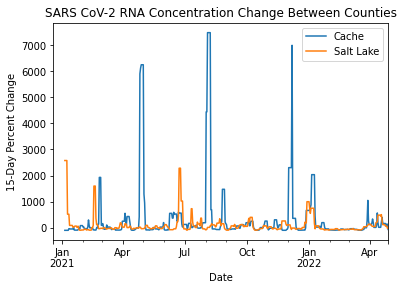

In [65]:
#plot of delSL and delCache overlayed. Interesting to see COVID surges in SL tend to predate COVID surges in Cache.
dfwdelJoin.plot(y=['ptc_15dCache','ptc_15dSaltLake'],xlabel='Date',ylabel='15-Day Percent Change',title='SARS CoV-2\
 RNA Concentration Change Between Counties')
plt.legend(['Cache','Salt Lake'])

I found this graph interesting as it appears as if COVID-19 surges in Salt Lake County predate similar surges in Cache county. This would make sense considering the urban nature of SL county and the rural nature of Cache county. The amplitude of Cache's 15-Day Percent Change also startled me. This could make sense due to the much smaller sample size in Cache County (94005) vs Salt Lake County (515494).

In [22]:
#more filtering. This time percentile column indicates whether levels of SARS-CoV-2 virus levels at a site are 
#currently higher or lower than past historical levels at the same site. 0% means levels are the lowest they have 
#been at the site; 100% means levels are the highest they have been at the site. 
dfwS = dfSL2[['date_end','percentile']]
dfwU = dfUT2[['date_end','percentile']]
dfwW = dfWashington2[['date_end','percentile']]
dfwC = dfCache2[['date_end','percentile']]

In [23]:
dfwS_set = dfwS.set_index('date_end')
dfwU_set = dfwU.set_index('date_end')
dfwW_set = dfwW.set_index('date_end')
dfwC_set = dfwC.set_index('date_end')

# Means of Coronavirus Concentration Historic Percentile

In [24]:
dfwS_set.mean()

percentile    52.448034
dtype: float64

In [25]:
dfwU_set.mean()

percentile    53.388966
dtype: float64

In [26]:
dfwW_set.mean()

percentile    51.025931
dtype: float64

In [27]:
dfwC_set.mean()

percentile    54.978056
dtype: float64

These means indicate that the COVID-19 rates, on average, were higher during the beginning of 2022 when compared to 2021. This may contrast similar findings using voluntary testing due to obligate inclusion of asymptomatic cases in wastewater data.

In [28]:
dfwSLUT = dfwS_set.join(dfwU_set,lsuffix='SaltLake',rsuffix='Utah')
dfwWC = dfwW_set.join(dfwC_set,lsuffix='Washington',rsuffix='Cache')

In [29]:
dfwJoin = dfwSLUT.join(dfwWC)

In [30]:
dfwJoin = dfwJoin.sort_values(by=['date_end'])

In [31]:
dfwJoin=dfwJoin.rename(columns={'percentileSaltLake':'SaltLakePercentile','percentileUtah':'UtahPercentile',\
                               'percentileWashington':'WashingtonPercentile','percentileCache':'CachePercentile'})

In [32]:
#Percentile calculation began in December of 2021 so I had to drop all the dates prior.
dfwJoin=dfwJoin.dropna(axis = 0,how='any')

<AxesSubplot:title={'center':'SARS CoV-2 RNA Wastewater Concentrations by County'}, xlabel='Date', ylabel='Percentile'>

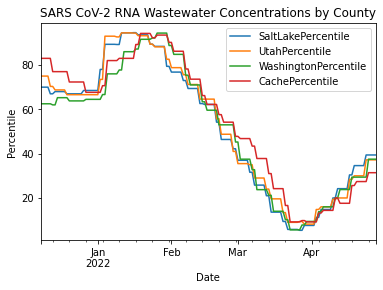

In [33]:
dfwJoin.plot(legend=True, title='SARS CoV-2 RNA Wastewater Concentrations by County',xlabel='Date',ylabel='Percentile')

This graph shows the relative concentrations of SARS CoV-2 RNA in the wastewater of the respective counties. There is a clear peak during the omicron wave, followed by a decrease through March, followed by another increase. This final increase my signify the BA.2 variant. I found the close correlation of the counties to be quite remarkable.

# Begin parsing of Vaccination Data

In [34]:
#reading the vaccination data, creating a dataframe, parsing date column
dfv = pd.read_csv('vaccination.csv', parse_dates= ['Date'])

# Begin filtering of Vaccination Data

In [35]:
#filtering out columns not of interest
dfv = dfv[['Date','FIPS','Recip_County', 'Administered_Dose1_Pop_Pct','Administered_Dose1_Recip_65PlusPop_Pct',\
            'Administered_Dose1_Recip_65PlusPop_Pct','Series_Complete_Pop_Pct']]

In [36]:
dfv = dfv.rename(columns={'Series_Complete_Pop_Pct':'%Vaccinated'})

I decided to focus on the percentage of total population who received at least two doses. This statistic (to me) best represents vaccination rate across the board.

In [37]:
#filter for SL county
df_SL_filter = dfv['FIPS']=='49035'

In [38]:
#dataframe for SL county
dfvSL=dfv[df_SL_filter]

In [39]:
df_Washington_filter = dfv['FIPS']=='49053'

In [40]:
df_Utah_filter = dfv['FIPS']=='49049'

In [41]:
df_Cache_filter = dfv['FIPS']=='49005'

In [42]:
dfvWashington = dfv[df_Washington_filter]

In [43]:
dfvUtah = dfv[df_Utah_filter]

In [44]:
dfvCache = dfv[df_Cache_filter]

In [45]:
dfvS = dfvSL[['Date','%Vaccinated']]
dfvU = dfvUtah[['Date','%Vaccinated']]
dfvW = dfvWashington[['Date','%Vaccinated']]
dfvC = dfvCache[['Date','%Vaccinated']]

In [46]:
dfvS_set = dfvS.set_index('Date')
dfvU_set = dfvU.set_index('Date')
dfvW_set = dfvW.set_index('Date')
dfvC_set = dfvC.set_index('Date')

In [47]:
dfvSLUT = dfvS_set.join(dfvU_set,lsuffix ='SaltLake',rsuffix='Utah')
dfvWC = dfvW_set.join(dfvC_set,lsuffix='Washington',rsuffix='Cache')

In [48]:
dfvJoin = dfvSLUT.join(dfvWC)

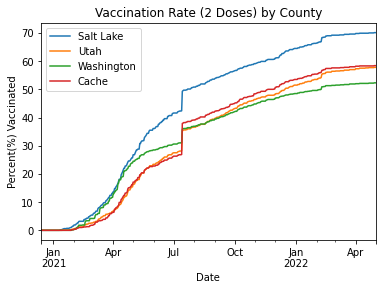

In [49]:
dfvJoin.plot(legend=True,title='Vaccination Rate (2 Doses) by County', ylabel='Percent(%) Vaccinated')
plt.legend(['Salt Lake','Utah','Washington','Cache'])

# Correlations of Vaccination Rate Across Counties

In [50]:
dfvJoin['%VaccinatedSaltLake'].corr(dfvJoin['%VaccinatedUtah'])

0.9939247016862496

In [51]:
dfvJoin['%VaccinatedSaltLake'].corr(dfvJoin['%VaccinatedWashington'])

0.9974361165885598

In [52]:
dfvJoin['%VaccinatedSaltLake'].corr(dfvJoin['%VaccinatedCache'])

0.9932894120322295

This graph and the respective correlations indicate a very close relationship in vaccination rates across all the counties. This was somewhat surprising to me considering the political and demographic differences between the counties.

In [53]:
dfvJoinDERIV = dfvJoin.diff(periods=-1,axis=0)

In [54]:
dfvwJoinDERIV = dfvJoinDERIV.join(dfwdelJoin)

In [55]:
dfvwJoin_del = dfvJoin.join(dfwdelJoin)

In [58]:
dfvwJoin = dfwJoin.join(dfvJoin)

In [59]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

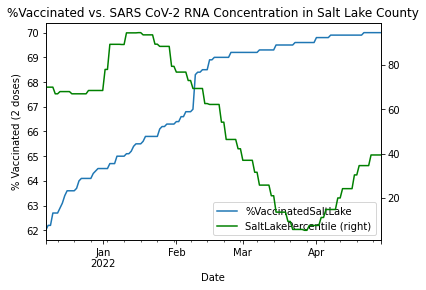

In [74]:
dfvwJoin['%VaccinatedSaltLake'].plot(legend=True)
dfvwJoin.SaltLakePercentile.plot(secondary_y=True,style='g',ylabel='% Vaccinated (2 doses)',
                                 xlabel='Date',title='%Vaccinated vs. SARS CoV-2 RNA Conc\
entration in Salt Lake County',mark_right=True,legend=True)

# Correlation between Vaccination Rate and Wastewater Concentration

In [61]:
dfvwJoin['%VaccinatedSaltLake'].corr(dfvwJoin['SaltLakePercentile'])

-0.7710875970245028

This graph and corresponding correlation coefficient indicate a strong inverse (negative) relationship between vaccination rate and Coronavirus wastewater concentration. This should seem obvious considering vaccines are meant to prevent/decrease transmission; however, considering the alarming amount of breakthrough cases at the beginning of the year, this figure is enlightening. Even if case counts were resurging due to breakthrough cases, the replicative success of the virus could have still been decreasing due to the effectiveness of vaccines. This would ultimately contribute to the decrease in wastewater RNA concentrations.